First cell contains common imports and helper functions.

In [1]:
import sys
from pathlib import Path
import time
import numpy as np
from pprint import pprint as pp
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.ion()
#plt.style.use('seaborn-v0_8-muted')

from IPython.display import Markdown
# To get multiple outputs into 1 cell w/o using print:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%load_ext autoreload
%autoreload 2

# -----------------------------------------
# TWO USEFUL FUNCTIONS:

def add_to_sys_path(this_path, up=False):
    """
    Prepend this_path to sys.path.
    If up=True, path refers to parent folder (1 level up).
    """
    if up:
        newp = Path(this_path).parent
    else:
        newp = Path(this_path)
    src = newp.joinpath("src")
    if src.exists():
        newp = str(src)
    else:
        newp = str(newp)
    if newp not in sys.path:
        sys.path.insert(1, newp)
        print('Path added to sys.path: {}'.format(newp))


# Filtered dir() for method discovery:
def fdir(obj, start_with_str='_', exclude=True):
    return [d for d in dir(obj) if not d.startswith(start_with_str) == exclude]


# Insert current src dir into sys.path so that modules in ../src can be imported:
# CHANGE THIS IF NEEDED:
add_to_sys_path(Path.cwd(), up=True)

Path added to sys.path: /home/cat/projects/mcce_dev/src


In [11]:
m1 = Path("x")
m2 = Path("x.py")

m1.suffix, m1.name
m2.suffix, m2.name, m2.stem

#update.name? nope, reset
m1 = Path(m1.name + ".py")
m1

Path("")

('', 'x')

('.py', 'x.py', 'x')

PosixPath('x.py')

PosixPath('.')

In [9]:
import pandas as pd

In [12]:
!cat {pKpath}

  pH             pKa/Em  n(slope) 1000*chi2      vdw0    vdw1    tors    ebkb    dsol   offset  pHpK0   EhEm0    -TS   residues   total
NTR+A0001_        <6.0                           0.00    0.00    0.00    0.00   16.42   -0.95   -2.00    0.00    0.00    0.00     13.47
LYS+A0001_        <6.0                           0.00    0.00    0.00    0.00   13.42    0.29   -4.40    0.00    0.00    0.00      9.31
ARG+A0005_        <6.0                           0.00    0.00    0.00    0.00    8.53    0.00   -6.50    0.00    0.57    0.00      2.60
GLU-A0007_        >7.0                           0.00    0.00    0.00    0.00   12.54   -0.22   -2.25    0.00    0.60    0.00     10.67
LYS+A0013_        <6.0                           0.00    0.00    0.00    0.00   13.42    0.29   -4.40    0.00    0.00    0.00      9.31
ARG+A0014_        <6.0                           0.00    0.00    0.00    0.00    8.57    0.00   -6.50    0.00    0.45    0.00      2.51
HIS+A0015_        <6.0                          

In [11]:
pk_df = pd.read_table(pKpath, sep=" ", header=0,)

ParserError: Error tokenizing data. C error: Expected 74 fields in line 3, saw 76


In [ ]:
pk_df

In [10]:
pd.read_table?

Signature:
pd.read_table(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'list[HashableT] | Callable[[Hashable], bool] | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Sequence[str] | Mapping[str, Sequence[str]] | None' = None,
    keep_default_na: 'bool' = True,
   

In [2]:
import ms_analysis as msa

In [3]:
fdir(msa.MSout)

['get_sampled_ms', 'load_msout']

## 0. Define operational paths

In [5]:
def reset_mso():
    """Clear mso from namespace.
    'Hanging' problem if msa.MSout instantiation is re-run."""
    try:
        mso in locals()
        del mso
    except NameError:
        return


#........................................
HERE = Path.cwd()  # do not change
HERE

test_folder = "granepura_GunnerLab/mcce_data" # you can change this to any other mcce folder
mcce_dir = HERE.parent.parent.joinpath(test_folder)  # do not change
mcce_dir, mcce_dir.exists()

msout_dir = mcce_dir.joinpath("ms_out")
!ls -l {msout_dir}

SAMPLED_PDBS = "test_pdb_output_mc"
PARSED_PDBS = "test_parsed_pdb_output_mc"

pdbs_dir = mcce_dir.joinpath(SAMPLED_PDBS)
if not pdbs_dir.is_dir():
    pdbs_dir.mkdir()

#empty_parsed_dir = True
parsed_dir = mcce_dir.joinpath(PARSED_PDBS)
if not parsed_dir.exists():
    parsed_dir.mkdir()


PosixPath('/home/cat/projects/mcce_dev/notebooks')

(PosixPath('/home/cat/projects/granepura_GunnerLab/mcce_data'), True)

total 60012
-rw-r--r-- 1 cat cat 61450968 Oct 18 12:32 pH7eH0ms.txt


---
# Sampling function

In [6]:
msout_filepath = mcce_dir.joinpath("ms_out", "pH7eH0ms.txt")
print(f"msout file: {msout_filepath}; Exists: {msout_filepath.exists()}")

reset_mso()

start = time.time()
mso = msa.MSout(msout_filepath)
d = time.time() - start

total_ms = msa.ms_counts(mso.microstates)
print(f"Instantiating `msa.MSout` took {d/60:.2f} mins or {d:.2f} seconds")
print(f"Number of distinct microstates: {len(mso.microstates) = :,}")
print(f"Total number of microstates: {total_ms = :,}")

msout file: /home/cat/projects/granepura_GunnerLab/mcce_data/ms_out/pH7eH0ms.txt; Exists: True
Instantiating `msa.MSout` took 1.53 mins or 91.90 seconds
Number of distinct microstates: len(mso.microstates) = 3,086,617
Total number of microstates: total_ms = 9,000,000


In [7]:
ms_list0 = list(mso.microstates.values())
size = 10

In [33]:
ms_list = ms_list0[:200]

ms_list = list(mso.microstates.values())
size = 10

In [34]:
# deterministic

# coomon to both kinds:
ms_sampled = []

counts = msa.ms_counts(ms_list)  # total number of ms
counts

sampled_cumsum = np.cumsum([mc.count for mc in ms_list])
print("sampled_cumsum\n", sampled_cumsum)

# dterm
sampled_ms_indices = np.arange(size, counts - size, counts / size, dtype=int)
print(f"{sampled_ms_indices = }")

for i in sampled_ms_indices:
    ## np.where(cond) returns indices where cond is True
    ms_sel_index = np.where((sampled_cumsum - i) > 0)[0][0]
    #print(ms_sel_index)
    ms_sampled.append([ms_sel_index, ms_list[ms_sel_index]])

#ms_sampled

9000000

sampled_cumsum
 [      1       2       6 ... 8999995 8999998 9000000]
sampled_ms_indices = array([     10,  900010, 1800010, 2700010, 3600010, 4500010, 5400010,
       6300010, 7200010, 8100010])


In [35]:
# random

seed = None
ms_sampled = []
counts = msa.ms_counts(ms_list)  # total number of ms
counts
sampled_cumsum = np.cumsum([mc.count for mc in ms_list])
print("sampled_cumsum\n", sampled_cumsum)

rng = np.random.default_rng(seed=seed)
sampled_ms_indices = rng.integers(low=0,
                                  high=counts,  #len(ms_list), #mso.microstates),
                                  size=size,
                                  endpoint=True)
print(f"{sampled_ms_indices = }")

for i in sampled_ms_indices:
    ms_sel_index = np.where((sampled_cumsum - i) > 0)[0][0]
    #print(ms_sel_index)
    ms_sampled.append([ms_sel_index, ms_list[ms_sel_index]])


9000000

sampled_cumsum
 [      1       2       6 ... 8999995 8999998 9000000]
sampled_ms_indices = array([  77467, 6548872,  243205, 5586716,  176340, 3690767, 3779363,
       4939152, 1310182,  311024])


In [37]:
len(ms_list)

3086617

In [36]:
sampled_ms_indices

array([  77467, 6548872,  243205, 5586716,  176340, 3690767, 3779363,
       4939152, 1310182,  311024])

In [39]:
c = 311024
sampled_cumsum - c
np.where((sampled_cumsum - c) > 0)[0][0]

array([-311023, -311022, -311018, ..., 8688971, 8688974, 8688976])

107095

---
## 1. Get Conformers from head3; Populate MSout instance; Get fixed iconfs

In [ ]:
conformers = msa.read_conformers(mcce_dir.joinpath("head3.lst"))
print(f"{len(conformers) = :,}")

In [ ]:
msout_filepath = mcce_dir.joinpath("ms_out", "pH7eH0ms.txt")
print(f"msout file: {msout_filepath}; Exists: {msout_filepath.exists()}")

reset_mso()

start = time.time()
mso = msa.MSout(msout_filepath)
d = time.time() - start

print(f"Instantiating `msa.MSout` took {d/60:.2f} mins or {d:.2f} seconds")
print(f"Number of distinct microstates: {len(mso.microstates) = :,}")

msout file: /home/cat/projects/granepura_GunnerLab/mcce_data/ms_out/pH7eH0ms.txt; Exists: True
MSout.load_msout :: len(lines) = 3,114,663


In [ ]:
ms_counts = msa.ms_counts(mso.microstates)
print(f"Total number of microstates: {ms_counts = :,}")

fixed_iconfs = mso.fixed_iconfs  # For ms_sample_to_pdbs.
len(fixed_iconfs)

## 2. Get ms sample:

In [7]:
# for testing: fixed random sampling
sampled_ms = mso.get_sampled_ms(size = 2, kind = "random", seed=1)
sampled_ms

[[501912, <ms_analysis.Microstate at 0x7f4d64c7ef50>],
 [542778, <ms_analysis.Microstate at 0x7f4d64201090>]]

## 3. Create pdbs from sampled ms:

In [8]:
pipecli.clear_folder(pdbs_dir)
!ls -l {pdbs_dir}

pipecli.ms_sample_to_pdbs(sampled_ms, conformers, fixed_iconfs, mcce_dir, pdbs_dir)
!ls -l {pdbs_dir}

total 0
	confs_to_pdb - Written: /home/cat/projects/granepura_GunnerLab/mcce_data/test_pdb_output_mc/ms_pdb_501912.pdb
	confs_to_pdb - Written: /home/cat/projects/granepura_GunnerLab/mcce_data/test_pdb_output_mc/ms_pdb_542778.pdb
	ms_sample_to_pdbs - over: 2 Sampled microstates saved to pdbs in:
	output_folder = PosixPath('/home/cat/projects/granepura_GunnerLab/mcce_data/test_pdb_output_mc')
total 2256
-rw-r--r-- 1 cat cat 1151276 Dec  7 18:45 ms_pdb_501912.pdb
-rw-r--r-- 1 cat cat 1151730 Dec  7 18:45 ms_pdb_542778.pdb


## 4. Convert mcce pdbs to gromacs: ("2_steps" converiosn as per Mohamed's code)

In [9]:
pipecli.clear_folder(parsed_dir)
!ls -l {parsed_dir}

list_cofactors = ["CLA","CLB","BCR","SQD","HOH","MEM"]

pipecli.pdbs_to_gmx(pdbs_dir, parsed_dir, cofactors_list = list_cofactors)

!ls -l {parsed_dir}

total 0
Conversion over
	Converted in /home/cat/projects/granepura_GunnerLab/mcce_data/test_parsed_pdb_output_mc: pdb_out = 'ms_pdb_542778_gromacs.pdb'
Conversion over
	Converted in /home/cat/projects/granepura_GunnerLab/mcce_data/test_parsed_pdb_output_mc: pdb_out = 'ms_pdb_501912_gromacs.pdb'
total 2400
-rw-r--r-- 1 cat cat 1226372 Dec  7 18:47 ms_pdb_501912_gromacs.pdb
-rw-r--r-- 1 cat cat 1226862 Dec  7 18:47 ms_pdb_542778_gromacs.pdb


## 5. Get site energies

In [27]:
pipecli.microstates_sites_energies(parsed_dir, cofactors_list = list_cofactors)

microstates_sites_energies - /home/cat/projects/granepura_GunnerLab/mcce_data/test_parsed_pdb_output_mc/ms_pdb_501912_gromacs.pdb
---------------
Calculating CDC
---------------
A_CLA_501
A_CLA_502
A_CLA_503
A_CLA_504
A_CLA_505
A_CLA_506
A_CLA_507
A_CLA_508
A_CLA_509
A_CLA_510
A_CLA_511
A_CLA_512
A_CLA_513
A_CLA_516
A_CLA_517
A_CLA_518
A_CLA_519
microstates_sites_energies - /home/cat/projects/granepura_GunnerLab/mcce_data/test_parsed_pdb_output_mc/ms_pdb_542778_gromacs.pdb
---------------
Calculating CDC
---------------
A_CLA_501
A_CLA_502
A_CLA_503
A_CLA_504
A_CLA_505
A_CLA_506
A_CLA_507
A_CLA_508
A_CLA_509
A_CLA_510
A_CLA_511
A_CLA_512
A_CLA_513
A_CLA_516
A_CLA_517
A_CLA_518
A_CLA_519


In [37]:
import pandas as pd

In [38]:
parsed_dir.joinpath("dict_site_energies.npy").exists()

site_data = np.load(parsed_dir.joinpath("dict_site_energies.npy"), allow_pickle=True).tolist()

sites_df = pd.DataFrame.from_dict(site_data)
sites_df

True

dict

,ms_pdb_501912_gromacs,ms_pdb_542778_gromacs
A_CLA_501,-34.255781,-9.066049
A_CLA_502,73.454437,-20.582911
A_CLA_503,-99.944717,-11.084971
A_CLA_504,80.420517,25.174581
A_CLA_505,3.282196,10.667744
A_CLA_506,33.533278,20.732816
A_CLA_507,62.651816,56.194998
A_CLA_508,-70.468563,-105.793116
A_CLA_509,-32.045614,131.215247
A_CLA_510,-86.818068,-101.452404


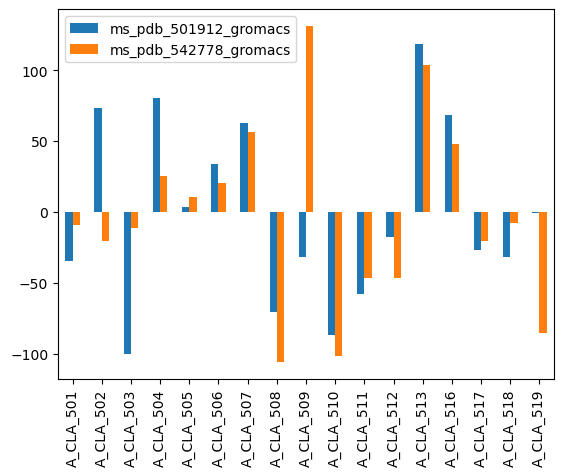

In [45]:
sites_df.plot(kind='bar');

## 6. Get matrices:

In [25]:
pipecli.ms_matrix(parsed_dir)

	ms_matrix - /home/cat/projects/granepura_GunnerLab/mcce_data/test_parsed_pdb_output_mc/residue_matrix_free.csv already exists.
	ms_matrix - /home/cat/projects/granepura_GunnerLab/mcce_data/test_parsed_pdb_output_mc/residue_matrix.csv already exists.


In [26]:
!ls -l {parsed_dir}

total 2420
drwxr-xr-x 3 cat cat    4096 Dec  7 18:47 CDC_ms_pdb_501912_gromacs
drwxr-xr-x 3 cat cat    4096 Dec  7 18:47 CDC_ms_pdb_542778_gromacs
-rw-r--r-- 1 cat cat 1226372 Dec  7 18:47 ms_pdb_501912_gromacs.pdb
-rw-r--r-- 1 cat cat 1226862 Dec  7 18:47 ms_pdb_542778_gromacs.pdb
-rw-r--r-- 1 cat cat    6835 Dec  7 18:50 residue_matrix.csv
-rw-r--r-- 1 cat cat     235 Dec  7 18:50 residue_matrix_free.csv


## END
---

In [75]:
import itertools as itt
from Bio import PDB
from pymembrane.structure.atomic_protein import ProteinAtomic

import subprocess

def run_subprocess(cmd: str):
    #grep -n HID {pdb_path}
    #f"grep -E 'MONTE_T)|MONTE_RUNS|MONTE_NITER' {runprm_path} | sed -e 's/(//g; s/MONTE_//g; s/)//g'",
    try:
        data = (subprocess.run(cmd,
                               capture_output=True,
                               shell=True,
                               check=True,
                              )
                .stdout.decode()
                .splitlines()
                )

    except subprocess.CalledProcessError as E:
        #raise EnvironmentError(f"Could not run {cmd}\n{E}")
        data = None

    return data

In [72]:
pdb_path = parsed_dir.joinpath("ms_pdb_542778_gromacs.pdb")
pdb_path

PosixPath('/home/cat/projects/granepura_GunnerLab/mcce_data/test_parsed_pdb_output_mc/ms_pdb_542778_gromacs.pdb')

In [74]:
# For documenting problems with "all steps mcce -> gmx conversion"
pdb_path

with open(pdb_path) as fh:
    lines = fh.readlines()
n_lines = len(lines)

pdb_obj = PDB.PDBParser(QUIET=True).get_structure("Isia", pdb_path)

list_atomic_atoms = [atom for atom in pdb_obj.get_atoms()]
parsed_pdb_size = len(list_atomic_atoms)

# building of `dict_atomic_ids` in ProteinAtomic.set_atomic_charges(:
list_atomic_ids = [f'{atom.get_full_id()[2]}_{atom.get_parent().resname}_{atom.get_parent().id[1]}_{atom.get_id()}'
                   for atom in pdb_obj.get_atoms()]
dict_atomic_ids = dict(zip(list_atomic_ids, list_atomic_atoms))

d = n_lines - parsed_pdb_size

# test atoms ids (as per pymembrane) from pdb lines
atoms_id_crg = []
res = 'HID'
n_res = 0

for line in lines:
    if line[0:6].strip() in ['ATOM', 'HETATM']:
        atom_id = f"{line[21]}_{line[17:20]}_{int(line[22:26].strip())}_{line[12:17].strip()}"
        if res in atom_id:
            n_res += 1
        charge = line[80:90].strip()
        if charge == '' or charge == 'None':
            charge = 0.
        else:
            charge = float(charge)
        atoms_id_crg.append((atom_id, charge))

assert len(atoms_id_crg) == n_lines

cmd = f"grep -n {res} {pdb_path}"
gmx_res_data = run_subprocess(cmd)

print(f"gmx pdb {pdb_path} has {n_lines:,} lines.",
      f"Count of {res = } in gmx pdb: {n_res = }",
      f"Size from PDB.PDBParser {parsed_pdb_size = :,}; diff: {d}; Missing {n_res} {res}; Unaccounted for = {d - n_res}",
      f"Is {res} in `list_atomic_ids` generated from PDB.PDBParser? {res in list_atomic_ids}",
      sep = "\n")

if not gmx_res_data is None:
      print("\nThe converted pdb has these {res} entries eliminated by PDB.PDBParser when all the steps in the converter are run:",
            gmx_res_data, sep = "\n")


PosixPath('/home/cat/projects/granepura_GunnerLab/mcce_data/test_parsed_pdb_output_mc/ms_pdb_542778_gromacs.pdb')

gmx pdb /home/cat/projects/granepura_GunnerLab/mcce_data/test_parsed_pdb_output_mc/ms_pdb_542778_gromacs.pdb has 12,519 lines.
Count of res = 'HID' in gmx pdb: n_res = 0
Size from PDB.PDBParser parsed_pdb_size = 12,519; diff: 0; Missing 0 HID; Unaccounted for = 0
Is HID in `list_atomic_ids` generated from PDB.PDBParser? False


---

### Argparse with sub-commands: a good idea?

Probably not, even if logging to file is implemented:
 - unlikely user will remember to check the log before continuing
 - no way to know which part of the pipeline was run and with which params

In [75]:
import mcce_cdc_pipeline as pipecli

In [77]:
pap = pipecli.pipeline_parser()
print(pap.prog,pap.description)
print(pap.usage)

mcce_cdc_pipeline 
    Run the 'MCCE_CDC pipeline' in 3 steps:
      step 1. ms sampling to pdbs
      step 2. mcce to gromacs pdbs conversion (using Mohamed's "2-step conversion")
      step 3. sites energies and create ms matrices

    Output folders:
      pdbs_dir = mcce_dir/pdb_output_mc
      parsed_dir = mcce_dir/parsed_pdb_output_mc


    step 1: ms sampling to pdbs
    ------
    Minimal number of arguments, 2: mcce dir, sample size

    Example:
    >mcce_cdc_pipeline.py step1 /path/to/mcce 3

    * All other args have their default values:
     -msout_file: "pH7eH0ms.txt"
     -sampling_kind: deterministic
     -sort_by: energy
     -reverse_sort: False
     -seed: None

    step 2: mcce to gromacs pdbs conversion
    ------
    Minimal number of arguments, 1: mcce dir

    Example:
    >mcce_cdc_pipeline.py step2 /path/to/mcce

    * All other args have their default values:
     -cofactors_list = ["CLA","CLB","BCR","SQD","HOH","MEM"]

    step 3: sites energies and create 

In [2]:
cli_parser = pipecli.pipeline_parser()

NameError: name 'pipecli' is not defined

In [1]:
args = cli_parser.parse_args(argv)
if args is None or argv is None:
    cli_parser.print_help()

NameError: name 'cli_parser' is not defined

In [ ]:
arg1 = f"step1 --help".split()
arg1 = f"step1 {mcce_dir} 2 -sampling_kind r".split()

args = cli_parser.parse_args(arg1)
args.func(args)

Namespace(mcce_dir=PosixPath('/home/cat/projects/granepura_GunnerLab/mcce_data'), sample_size=2, msout_file='pH7eH0ms.txt', sampling_kind='r', sort_by='energy', reverse_sort='False', seed=None, func=<function do_ms_to_pdbs at 0x7efe44e44360>)
	Gettings conformers
	Instantiating MSout


---

---
# TODO? PDB conversions

## name.txt
> Rename rule file contains rules to format atom names and residue names.
 The purpose is to unify residue names to 3-char mcce names
 and break some big cofactors into small ones.
 Each line has two fields separated by at least one space. Each field
 is 14 characters long, matching the atom, residue name, chainID and
 sequence number field of a pdb line. The first string will be
 replaced by the second string.
 Symbol "*" in the first string is a wildcard that matchs any character.
 It means "do not replace" in the second string.
 The replace is accumulative in the order of appearing in this file.


The first 3 lines:
```python
0123456789012  01234567890123
***** *******  *****_********
****** *****   ******_*******
******* ***  > *******_****
```
mean: replace a space in position 5, 6 or 7 by "_".

**

In [149]:
nametxt = mcce_dir.joinpath("name.txt")
nametxt

# use when running subprocesses from this nbk
nametxt2 = nametxt.relative_to(Path.cwd().parent)
nametxt2

PosixPath('/home/cat/projects/mcce_dev/data/4lzt/name.txt')

PosixPath('data/4lzt/name.txt')

In [93]:
import re
from collections import defaultdict


regex = r'^\*{5,8}\s\*{5,}\s\s'
split_tag = "*@@"

mcce_to_pdb_name_dict = defaultdict(list)
with open(nametxt) as f:
    for i, line in enumerate(f):
        if (line.startswith("#")
            or line.startswith(" D")
            or re.match(regex, line)
           ):
            continue
        if len(line) <29:
            continue

        line = line[:30].replace("*  ", split_tag)
        from_str, to_str = line.split(split_tag)[:2]
        mcce_to_pdb_name_dict[to_str].append(from_str)
